# Basic Analysis

## Import Dependency from Helper 

In [1]:
%run ./dtale_dataprep_helper.ipynb

## Initialise Dataframe , Features and Labels.

In [2]:
data_df = pd.read_csv('DATA/Advertising.csv')
X = data_df.drop("sales",axis=1)
y = data_df["sales"]
dep_folder = "deployments/sales_models"
os.makedirs(dep_folder, exist_ok=True)
test_inputs = [[149,22,12]]
# Parameters for RIDGECV
ridge_cv_alphas = (0.1, 1.0, 10.0)
# Parameters for LASSO
lasso_eps=0.1
lasso_n_alphas=100
lasso_cv=5
lasso_max_iter=1000
# Parameters for ElasticNet
en_ratio = [.1, .5, .7,.9, .95, .99, 1]
en_alphas=100
en_eps = 0.001
en_max_iter=1000000

## Display Data

In [3]:
data_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Display Features

In [4]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


## Display Label

In [5]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

##  Describe and Info the dataframe. Make Pairplot

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


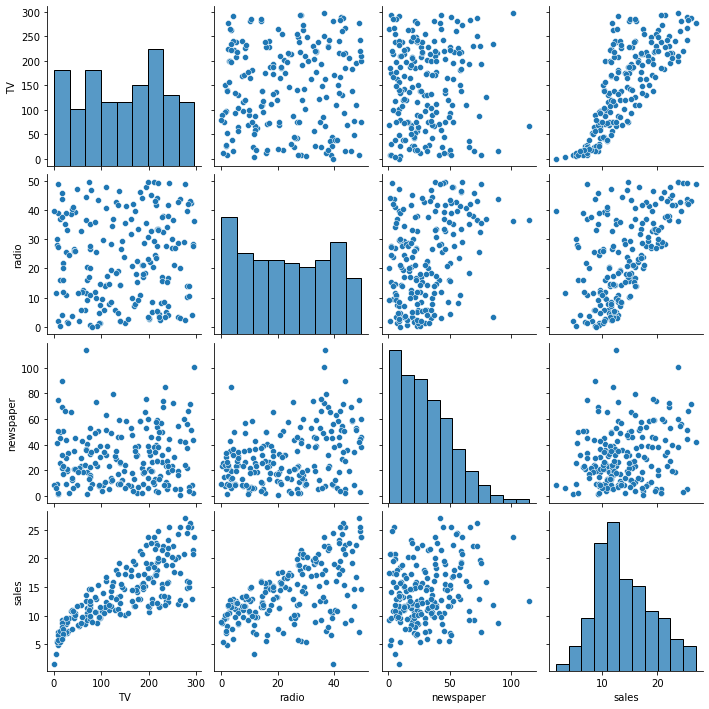

In [8]:
sns.pairplot(data_df)
plt.show()

### Histogram Distribution of Label

<AxesSubplot:xlabel='sales', ylabel='Count'>

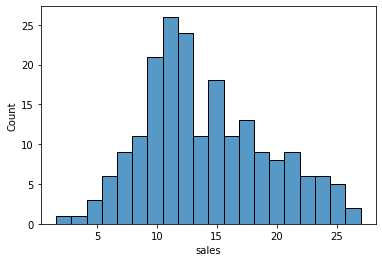

In [9]:
sns.histplot(data=data_df,x=y,bins=20)

## Mean/Medan of the Label

In [10]:
y.mean()

14.022500000000003

In [11]:
y.median()

12.9

# Basic Simple Linear Regression

## DO Test Train Split And Display Training Features

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


## Create Model , Fit on Training Dataset and Predict on Testing Dataset

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
test_predictions = model.predict(X_test)

In [17]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [18]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


## Get Error Estimations, Residual Plots

### Get MAE,MSE,RMSE

In [19]:
all_error_metrics(y_test,test_predictions)

MAE is : 1.2137457736144803 , MSE is : 2.2987166978863782 , RMSE is : 1.516151937599388 


{'mae': 1.2137457736144803,
 'mse': 2.2987166978863782,
 'rmse': 1.516151937599388}

In [20]:
#### A bad RMSE but good MAE means model is working well for most points except for some points where it is completely off

## Residual Plots

In [21]:
#### Residual Errors should be close to normaly distributed and must be random. 

In [22]:
#### Raw Residual plots should not have a pattern .There shouldnt be any clear line or curve and there should be about as many points above 0 as below 0

In [23]:
test_residuals = y_test -  test_predictions

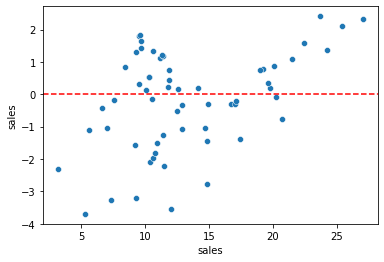

In [24]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color="red",ls="--")

<AxesSubplot:xlabel='sales', ylabel='Count'>

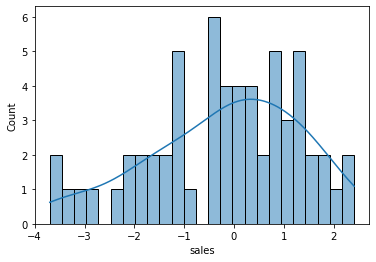

In [25]:
sns.histplot(test_residuals,bins=25,kde=True)

## Deploy the Model using Full Dataset

### Create Model and Check Coeffecient

In [26]:
final_model = LinearRegression()
final_model.fit(X,y)
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [27]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [28]:
dump(final_model,f"./{dep_folder}/slr_basic_model.joblib")

['./deployments/sales_models/slr_basic_model.joblib']

In [29]:
loaded_model = load(f"./{dep_folder}/slr_basic_model.joblib")
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

### Make Sample Prediction

In [30]:
X.shape

(200, 3)

In [31]:
loaded_model.predict(test_inputs)

array([13.893032])

# Polynomial Regression

## Do polynomial regression with degree 2

### Transform features to Polynomial

In [32]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [33]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [34]:
poly_features = polynomial_converter.transform(X)

In [35]:
poly_features.shape

(200, 9)

In [36]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [37]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

### Make Test Train Split & Display Features

In [38]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [39]:
X_train

array([[1.93200e+02, 1.84000e+01, 6.57000e+01, ..., 3.38560e+02,
        1.20888e+03, 4.31649e+03],
       [2.87600e+02, 4.30000e+01, 7.18000e+01, ..., 1.84900e+03,
        3.08740e+03, 5.15524e+03],
       [8.02000e+01, 0.00000e+00, 9.20000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.46400e+01],
       ...,
       [2.39800e+02, 4.10000e+00, 3.69000e+01, ..., 1.68100e+01,
        1.51290e+02, 1.36161e+03],
       [2.14700e+02, 2.40000e+01, 4.00000e+00, ..., 5.76000e+02,
        9.60000e+01, 1.60000e+01],
       [1.63300e+02, 3.16000e+01, 5.29000e+01, ..., 9.98560e+02,
        1.67164e+03, 2.79841e+03]])

### Create Model , Fit on Training Dataset and Predict on Testing Dataset. Check model Coeffecient

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
test_predictions = model.predict(X_test)

In [43]:
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [44]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

### Get MAE,MSE,RMSE

In [45]:
all_error_metrics(y_test,test_predictions)

MAE is : 0.4896798044803855 , MSE is : 0.4417505510403794 , RMSE is : 0.6646431757269305 


{'mae': 0.4896798044803855,
 'mse': 0.4417505510403794,
 'rmse': 0.6646431757269305}

## Polynomial Regression with more degrees for Overfitting.Underfitting

### Chosing the right model

In [46]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# Residuals Per degree
test_residuals_arr = []

for d in range(1,10):
    
    print(f"\n\nChecking for Degree {d}")
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # calculate residuals
    test_residuals = y_test -  test_pred
    
    # Calculate Errors
    
    # Errors on Train Set
    print("Calculating Training Error")
    train_RMSE = all_error_metrics(y_train,train_pred)["rmse"]
    
    # Errors on Test Set
    print("Calculating Testing Error")
    test_RMSE = all_error_metrics(y_test,test_pred)["rmse"]
    
    # Print Model Coeffecients
    print(f"Model Coeffecients \n{model.coef_} ")

    # Append errors,test_residuals to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    test_residuals_arr.append(test_residuals)



Checking for Degree 1
Calculating Training Error
MAE is : 1.252446303416864 , MSE is : 3.0088167761579943 , RMSE is : 1.7345941243293759 
Calculating Testing Error
MAE is : 1.2137457736144808 , MSE is : 2.298716697886378 , RMSE is : 1.5161519375993877 
Model Coeffecients 
[ 0.04469599  0.1875657  -0.00032275] 


Checking for Degree 2
Calculating Training Error
MAE is : 0.4049248139151678 , MSE is : 0.34569391424439977 , RMSE is : 0.5879574085292231 
Calculating Testing Error
MAE is : 0.4896798044803855 , MSE is : 0.4417505510403794 , RMSE is : 0.6646431757269305 
Model Coeffecients 
[ 5.17095811e-02  1.30848864e-02  1.20000085e-02 -1.10892474e-04
  1.14212673e-03 -5.24100082e-05  3.34919737e-05  1.46380310e-04
 -3.04715806e-05] 


Checking for Degree 3
Calculating Training Error
MAE is : 0.29109696806303736 , MSE is : 0.1882990944777783 , RMSE is : 0.4339344356902069 
Calculating Testing Error
MAE is : 0.41275160853417725 , MSE is : 0.3367813797527569 , RMSE is : 0.5803286825177236 


In [47]:
train_rmse_errors

[1.7345941243293759,
 0.5879574085292231,
 0.4339344356902069,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.421422348088456,
 0.1424969455213967,
 0.1665207515517613]

In [48]:
rmse_err_df = pd.DataFrame(list(zip(train_rmse_errors,test_rmse_errors)),columns=['TrainingError','Testing Error'])
rmse_err_df

,TrainingError,Testing Error
0,1.734594,1.516152
1,0.587957,0.664643
2,0.433934,0.580329
3,0.351708,0.507774
4,0.250934,2.575825
5,0.199407,4.490840
6,5.421422,1381.404069
7,0.142497,4449.567306
8,0.166521,95891.237158


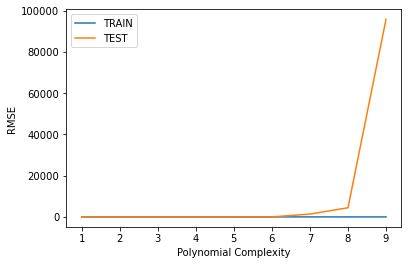

In [49]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [50]:
# We should use 1 or 2 degrees less than best fit because it is the region of risk.

### Plot Test Residuals,KDE for each degree tested

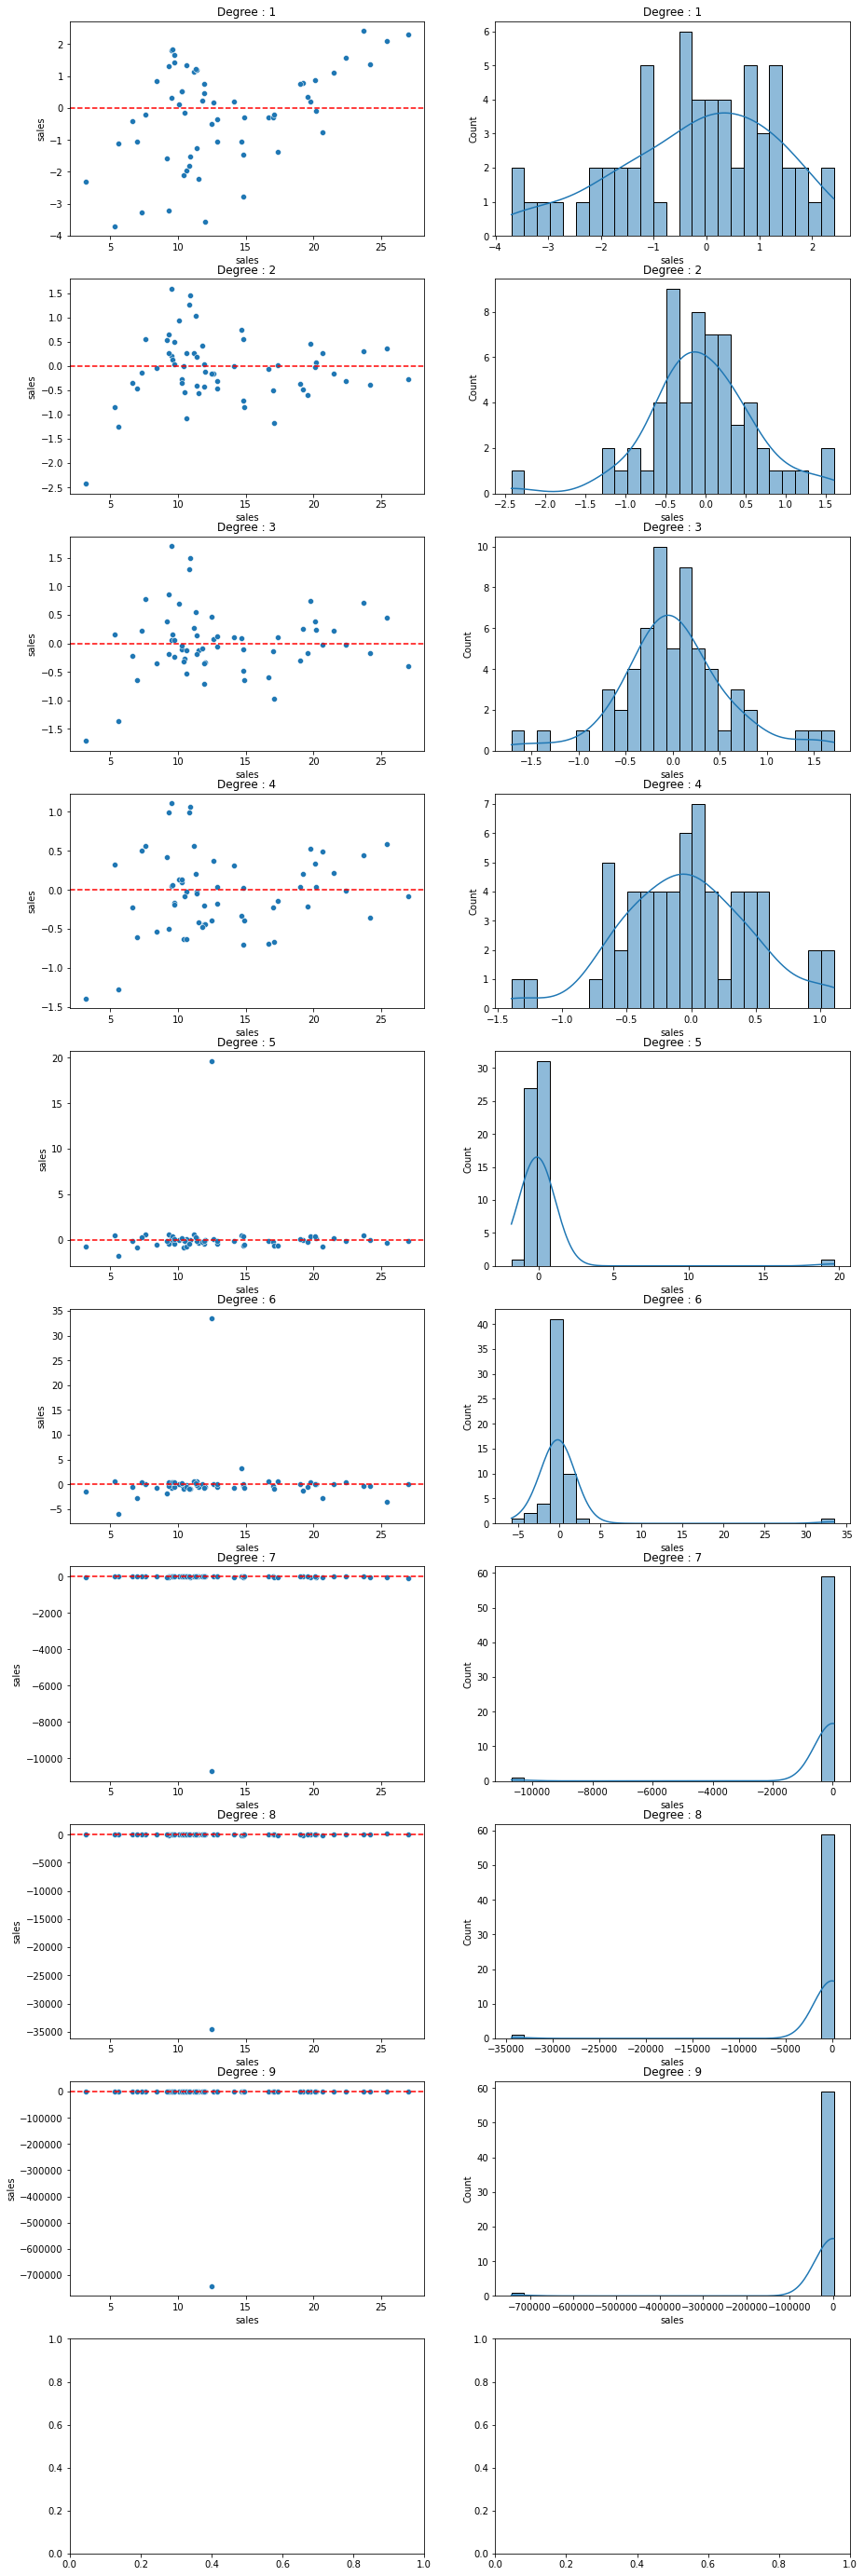

In [51]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(10,2,figsize=(15,50))

for index,curr_residual in enumerate(test_residuals_arr,):
    sns.scatterplot(x=y_test,y=curr_residual,ax=axes[index,0])
    #plt.axhline(y=0,color="red",ls="--")
    axes[index,0].title.set_text(f"Degree : {index+1}")
    axes[index,0].axhline(y=0,color="red",ls="--")
    sns.histplot(curr_residual,bins=25,kde=True,ax=axes[index,1])
    axes[index,1].title.set_text(f"Degree : {index+1}")
plt.show()

### Deployment

In [52]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [53]:
final_model = LinearRegression()

In [54]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [55]:
dump(final_model, f"./{dep_folder}/poly_model.joblib")
dump(final_poly_converter,f"./{dep_folder}/poly_converter.joblib")

['./deployments/sales_models/poly_converter.joblib']

### Make Predictons by loading model

In [56]:
loaded_poly_model = load(f"./{dep_folder}/poly_model.joblib")
loaded_poly_converter = load(f"./{dep_folder}/poly_converter.joblib")

In [57]:
transformed_poly = loaded_poly_converter.transform(test_inputs)
loaded_poly_model.predict(transformed_poly)

array([14.64501014])

## Polynomial Regression with more degrees for Overfitting.Underfitting with SCALING

### Chosing the right model

In [58]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# Residuals Per degree
test_residuals_arr = []

for d in range(1,10):
    
    print(f"\n\nChecking for Degree {d}")
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # SCALE THE TRAIN AND TEST SET BEFORE EVALUATING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # calculate residuals
    test_residuals = y_test -  test_pred
    
    # Calculate Errors
    
    # Errors on Train Set
    print("Calculating Training Error")
    train_RMSE = all_error_metrics(y_train,train_pred)["rmse"]
    
    # Errors on Test Set
    print("Calculating Testing Error")
    test_RMSE = all_error_metrics(y_test,test_pred)["rmse"]
    
    # Print Model Coeffecients
    print(f"Model Coeffecients \n{model.coef_} ")

    # Append errors,test_residuals to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    test_residuals_arr.append(test_residuals)



Checking for Degree 1
Calculating Training Error
MAE is : 1.252446303416864 , MSE is : 3.0088167761579956 , RMSE is : 1.7345941243293763 
Calculating Testing Error
MAE is : 1.213745773614481 , MSE is : 2.2987166978863787 , RMSE is : 1.5161519375993882 
Model Coeffecients 
[ 3.76599021  2.76548662 -0.00690986] 


Checking for Degree 2
Calculating Training Error
MAE is : 0.40492481391514024 , MSE is : 0.3456939142443997 , RMSE is : 0.5879574085292231 
Calculating Testing Error
MAE is : 0.4896798044803564 , MSE is : 0.44175055104033895 , RMSE is : 0.6646431757269 
Model Coeffecients 
[ 4.35694035  0.19292482  0.25690957 -2.82073059  3.7782365  -0.27172285
  0.02422714  0.13425441 -0.05457998] 


Checking for Degree 3
Calculating Training Error
MAE is : 0.2910969680594902 , MSE is : 0.18829909447777834 , RMSE is : 0.43393443569020695 
Calculating Testing Error
MAE is : 0.41275160852975146 , MSE is : 0.33678137975071165 , RMSE is : 0.5803286825159615 
Model Coeffecients 
[  7.18845622   0

In [59]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.43393443569020695,
 0.351708368839935,
 0.25093429198022715,
 0.19185821260128533,
 0.1056073775169378,
 5.165776185662657e-11,
 3.4192807374920077e-11]

In [60]:
rmse_err_df = pd.DataFrame(list(zip(train_rmse_errors,test_rmse_errors)),columns=['TrainingError','Testing Error'])
rmse_err_df

,TrainingError,Testing Error
0,1.734594e+00,1.516152
1,5.879574e-01,0.664643
2,4.339344e-01,0.580329
3,3.517084e-01,0.507774
4,2.509343e-01,2.575820
5,1.918582e-01,7.228640
6,1.056074e-01,113.145870
7,5.165776e-11,1396.845179
8,3.419281e-11,2342.536947


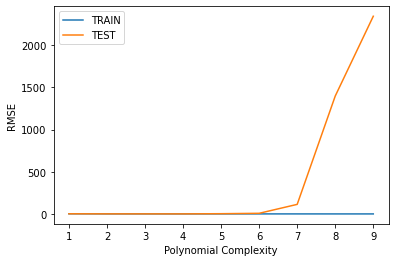

In [61]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [62]:
# We should use 1 or 2 degrees less than best fit because it is the region of risk.

### Plot Test Residuals,KDE for each degree tested

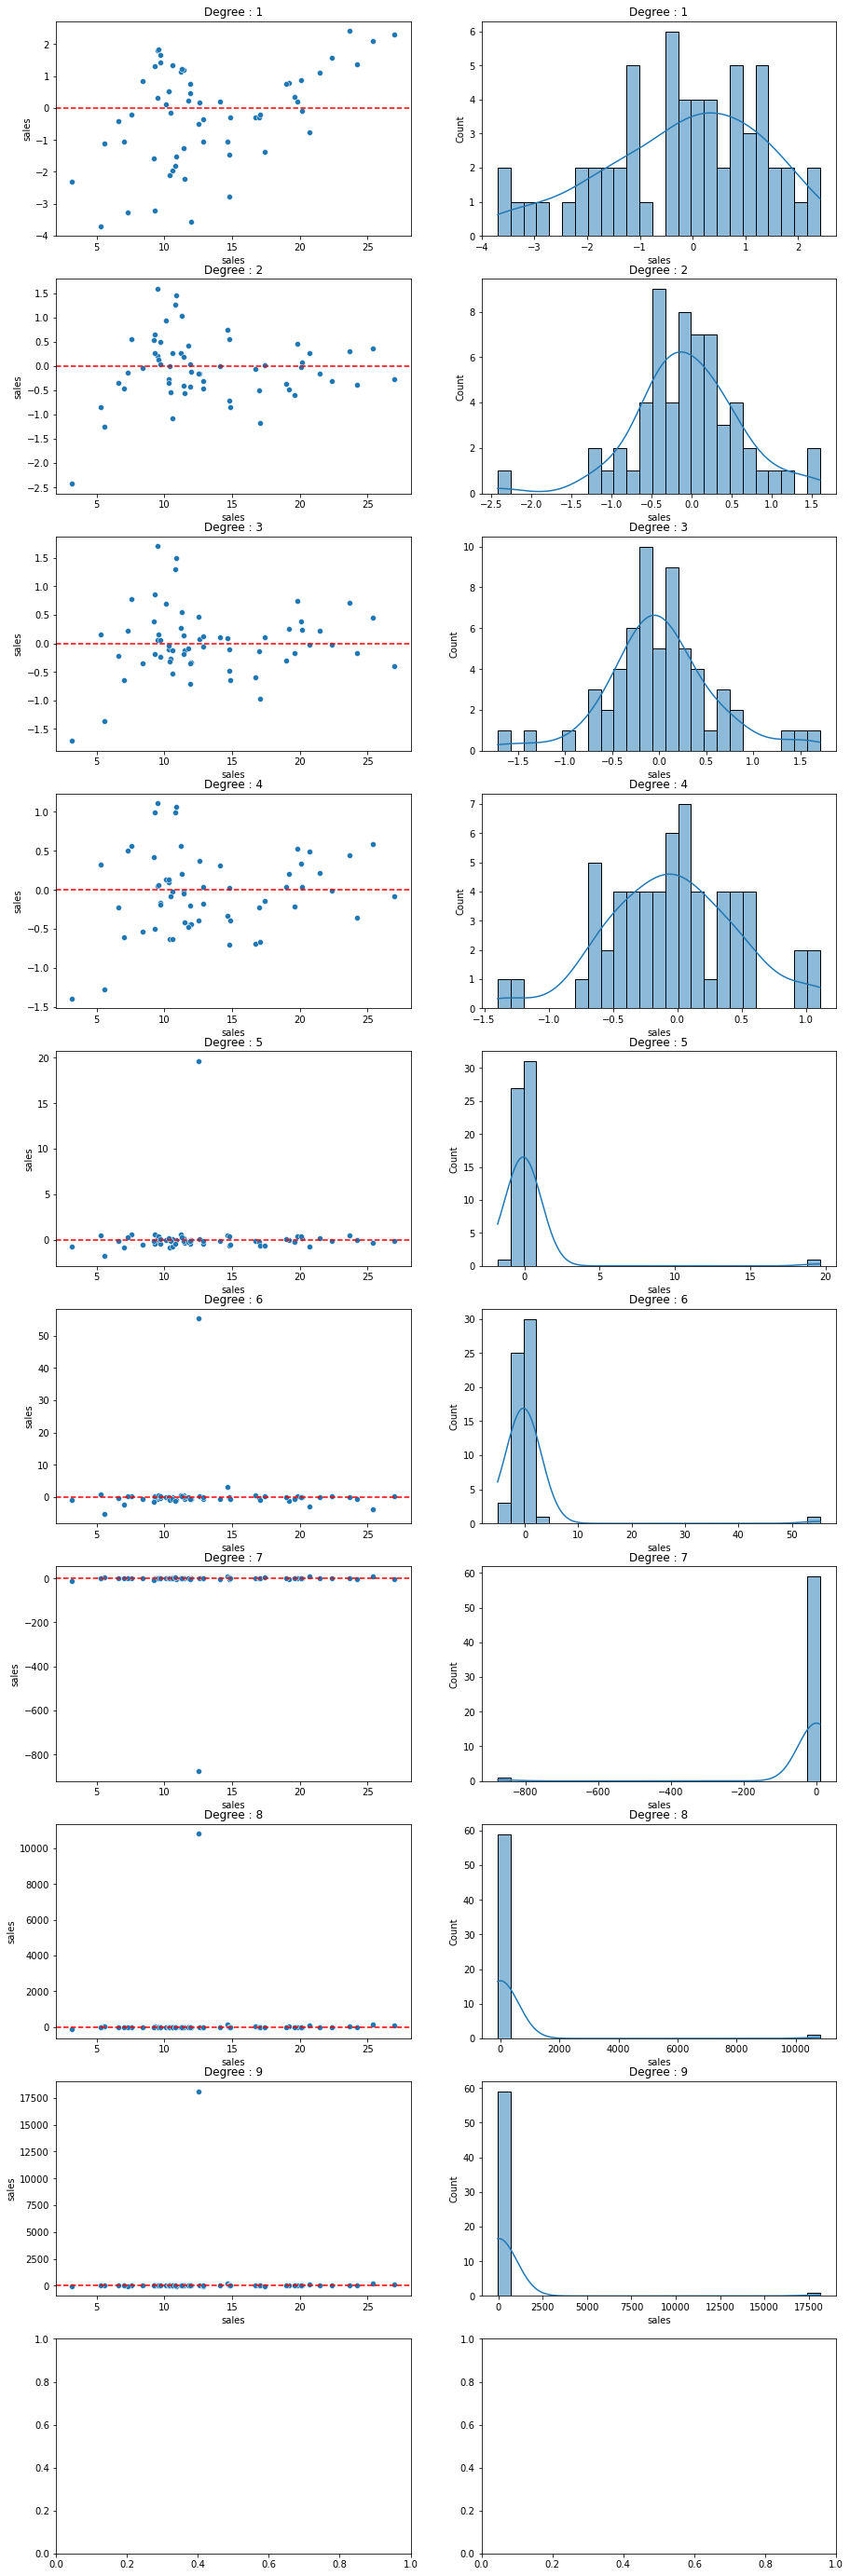

In [63]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(10,2,figsize=(15,50))

for index,curr_residual in enumerate(test_residuals_arr,):
    sns.scatterplot(x=y_test,y=curr_residual,ax=axes[index,0])
    #plt.axhline(y=0,color="red",ls="--")
    axes[index,0].title.set_text(f"Degree : {index+1}")
    axes[index,0].axhline(y=0,color="red",ls="--")
    sns.histplot(curr_residual,bins=25,kde=True,ax=axes[index,1])
    axes[index,1].title.set_text(f"Degree : {index+1}")
plt.show()

### Deployment

In [64]:
# Based on our chart, could have also been degree=4, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [65]:
final_model = LinearRegression()

In [66]:
# Scale Features before fitting to create new model.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [67]:
final_model.fit(final_poly_converter.fit_transform(X_scaled),y)

LinearRegression()

In [68]:
# Save the model , scaler & poly converter
dump(scaler, f"./{dep_folder}/poly_scaler.joblib")
dump(final_poly_converter,f"./{dep_folder}/poly_converter_scaled.joblib")
dump(final_model, f"./{dep_folder}/poly_model_scaled.joblib")

['./deployments/sales_models/poly_model_scaled.joblib']

### Make Predictons by loading model

In [69]:
loaded_poly_scaler = load(f"./{dep_folder}/poly_scaler.joblib")
loaded_poly_converter = load(f"./{dep_folder}/poly_converter_scaled.joblib")
loaded_poly_model = load(f"./{dep_folder}/poly_model_scaled.joblib")

In [70]:
transformed_poly = loaded_poly_converter.transform(loaded_poly_scaler.transform(test_inputs))
loaded_poly_model.predict(transformed_poly)

array([14.64501014])

# Regularization

## Ridge Regression

### Chose the right model

In [71]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# Residuals Per degree
test_residuals_arr = []

for d in range(1,10):
    
    print(f"\n\nChecking for Degree {d}")
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # SCALE THE TRAIN AND TEST SET BEFORE EVALUATING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET USING RIDGE CV
    # Default CV for RidgeCV is leave one out, which is effiecent but more time consuming so chose a better CV parameter based on requirement
    ridge_cv_model = RidgeCV(alphas=ridge_cv_alphas,scoring='neg_mean_absolute_error')
    ridge_cv_model.fit(X_train,y_train)
        
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = ridge_cv_model.predict(X_train)
    test_pred = ridge_cv_model.predict(X_test)
    
    # calculate residuals
    test_residuals = y_test -  test_pred
    
    # Calculate Errors
    
    # Errors on Train Set
    print("Calculating Training Error")
    train_RMSE = all_error_metrics(y_train,train_pred)["rmse"]
    
    # Errors on Test Set
    print("Calculating Testing Error")
    test_RMSE = all_error_metrics(y_test,test_pred)["rmse"]
    
    # Print Model Coeffecients
    print(f"Model Coeffecients \n{ridge_cv_model.coef_} ")
    
    # Print Best Lambda for this model
    print(f"Best Lambda for this model is  {ridge_cv_model.alpha_} ")

    # Append errors,test_residuals to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    test_residuals_arr.append(test_residuals)



Checking for Degree 1
Calculating Training Error
MAE is : 1.2524165466885495 , MSE is : 3.0088280358924804 , RMSE is : 1.7345973699658606 
Calculating Testing Error
MAE is : 1.214061762843722 , MSE is : 2.300652700354938 , RMSE is : 1.5167902624802607 
Model Coeffecients 
[ 3.76333559  2.76339947 -0.00593674] 
Best Lambda for this model is  0.1 


Checking for Degree 2
Calculating Training Error
MAE is : 0.38478538620846775 , MSE is : 0.3755277173923057 , RMSE is : 0.6128031636604904 
Calculating Testing Error
MAE is : 0.47968472675080276 , MSE is : 0.44252957040847357 , RMSE is : 0.665228960891266 
Model Coeffecients 
[ 3.69766547  0.30646673  0.25476618 -2.16096685  3.6868094  -0.17459767
 -0.00693886  0.10306714 -0.12876572] 
Best Lambda for this model is  1.0 


Checking for Degree 3
Calculating Training Error
MAE is : 0.3094132105639705 , MSE is : 0.2207985871984349 , RMSE is : 0.46989210165572576 
Calculating Testing Error
MAE is : 0.42737748843348755 , MSE is : 0.3820129881523

In [72]:
train_rmse_errors

[1.7345973699658606,
 0.6128031636604904,
 0.46989210165572576,
 0.4454012644465028,
 0.4358898354643055,
 0.42201957960101033,
 0.4089368827971964,
 0.5311121078111177,
 0.5270369778524069]

In [73]:
rmse_err_df = pd.DataFrame(list(zip(train_rmse_errors,test_rmse_errors)),columns=['TrainingError','Testing Error'])
rmse_err_df

,TrainingError,Testing Error
0,1.734597,1.516790
1,0.612803,0.665229
2,0.469892,0.618072
3,0.445401,0.624282
4,0.435890,0.661497
5,0.422020,0.796558
6,0.408937,1.039472
7,0.531112,0.818436
8,0.527037,0.924286


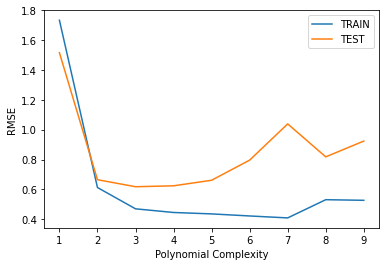

In [74]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [75]:
# We should use 1 or 2 degrees less than best fit because it is the region of risk.

### Plot Test Residuals,KDE for each degree tested

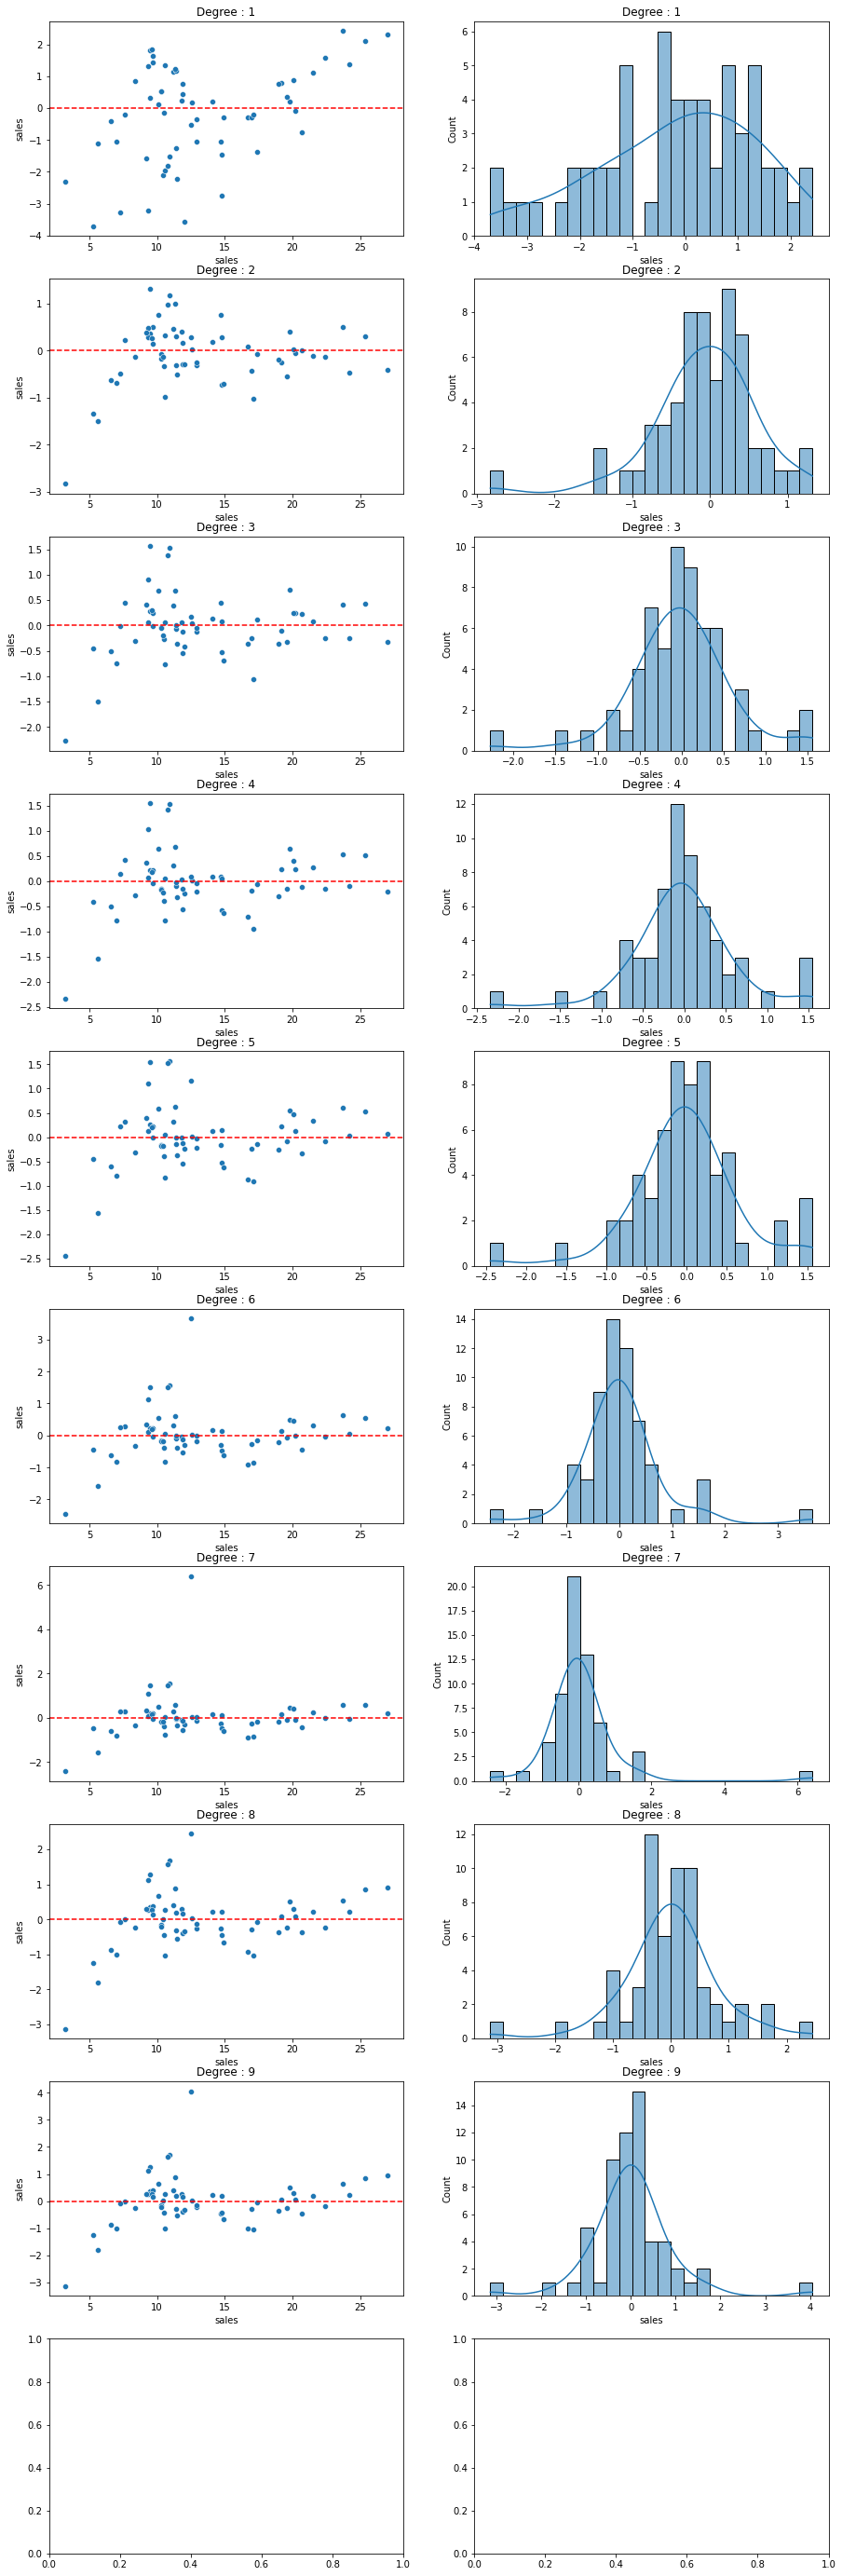

In [76]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(10,2,figsize=(15,50))

for index,curr_residual in enumerate(test_residuals_arr,):
    sns.scatterplot(x=y_test,y=curr_residual,ax=axes[index,0])
    #plt.axhline(y=0,color="red",ls="--")
    axes[index,0].title.set_text(f"Degree : {index+1}")
    axes[index,0].axhline(y=0,color="red",ls="--")
    sns.histplot(curr_residual,bins=25,kde=True,ax=axes[index,1])
    axes[index,1].title.set_text(f"Degree : {index+1}")
plt.show()

## Lasso Regression

### Chose the right Model

In [77]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# Residuals Per degree
test_residuals_arr = []

for d in range(1,10):
    
    print(f"\n\nChecking for Degree {d}")
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # SCALE THE TRAIN AND TEST SET BEFORE EVALUATING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET USING RIDGE CV
    """
    2 ways to mitigate the convergence problem for search parameter
    a)Smaller the Epsilon Value(eps) the larger range you are checking from 0.001 to 0.1 
    b)Increase max iterations from default of 1000 to 1000000
    """
    lasso_cv_model = LassoCV(eps=lasso_eps,n_alphas=lasso_n_alphas,cv=lasso_cv,max_iter=lasso_max_iter)
    lasso_cv_model.fit(X_train,y_train)
        
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = lasso_cv_model.predict(X_train)
    test_pred = lasso_cv_model.predict(X_test)
    
    # calculate residuals
    test_residuals = y_test -  test_pred
    
    # Calculate Errors
    
    # Errors on Train Set
    print("Calculating Training Error")
    train_RMSE = all_error_metrics(y_train,train_pred)["rmse"]
    
    # Errors on Test Set
    print("Calculating Testing Error")
    test_RMSE = all_error_metrics(y_test,test_pred)["rmse"]
    
    # Print Model Coeffecients
    print(f"Model Coeffecients \n{lasso_cv_model.coef_} ")
    
    # Print Best Lambda for this model
    print(f"Best Lambda for this model is  {lasso_cv_model.alpha_} ")

    # Append errors,test_residuals to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    test_residuals_arr.append(test_residuals)



Checking for Degree 1
Calculating Training Error
MAE is : 1.3068580097068883 , MSE is : 3.302027428615167 , RMSE is : 1.81714815813548 
Calculating Testing Error
MAE is : 1.2873601365766183 , MSE is : 2.8716125844741547 , RMSE is : 1.6945833070327805 
Model Coeffecients 
[3.39549312 2.39355522 0.        ] 
Best Lambda for this model is  0.39636306046337166 


Checking for Degree 2
Calculating Training Error
MAE is : 0.6912810761656593 , MSE is : 1.1983381277770653 , RMSE is : 1.094686314784772 
Calculating Testing Error
MAE is : 0.6541714287492473 , MSE is : 1.2787267928052637 , RMSE is : 1.1308080265037315 
Model Coeffecients 
[1.00261117 0.         0.         0.         3.79747867 0.
 0.         0.         0.        ] 
Best Lambda for this model is  0.4943070909225828 


Checking for Degree 3
Calculating Training Error
MAE is : 0.6912807140820695 , MSE is : 1.1983243366988912 , RMSE is : 1.0946800156661722 
Calculating Testing Error
MAE is : 0.6541723161252854 , MSE is : 1.27870887

In [78]:
train_rmse_errors

[1.81714815813548,
 1.094686314784772,
 1.0946800156661722,
 1.094680010524994,
 1.094680010524994,
 1.094680010524994,
 1.094680010524994,
 1.094680010524994,
 1.094680010524994]

In [79]:
rmse_err_df = pd.DataFrame(list(zip(train_rmse_errors,test_rmse_errors)),columns=['TrainingError','Testing Error'])
rmse_err_df

,TrainingError,Testing Error
0,1.817148,1.694583
1,1.094686,1.130808
2,1.094680,1.130800
3,1.094680,1.130800
4,1.094680,1.130800
5,1.094680,1.130800
6,1.094680,1.130800
7,1.094680,1.130800
8,1.094680,1.130800


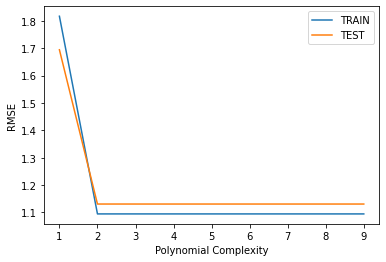

In [80]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [81]:
# We should use 1 or 2 degrees less than best fit because it is the region of risk.

### Plot Test Residuals,KDE for each degree tested

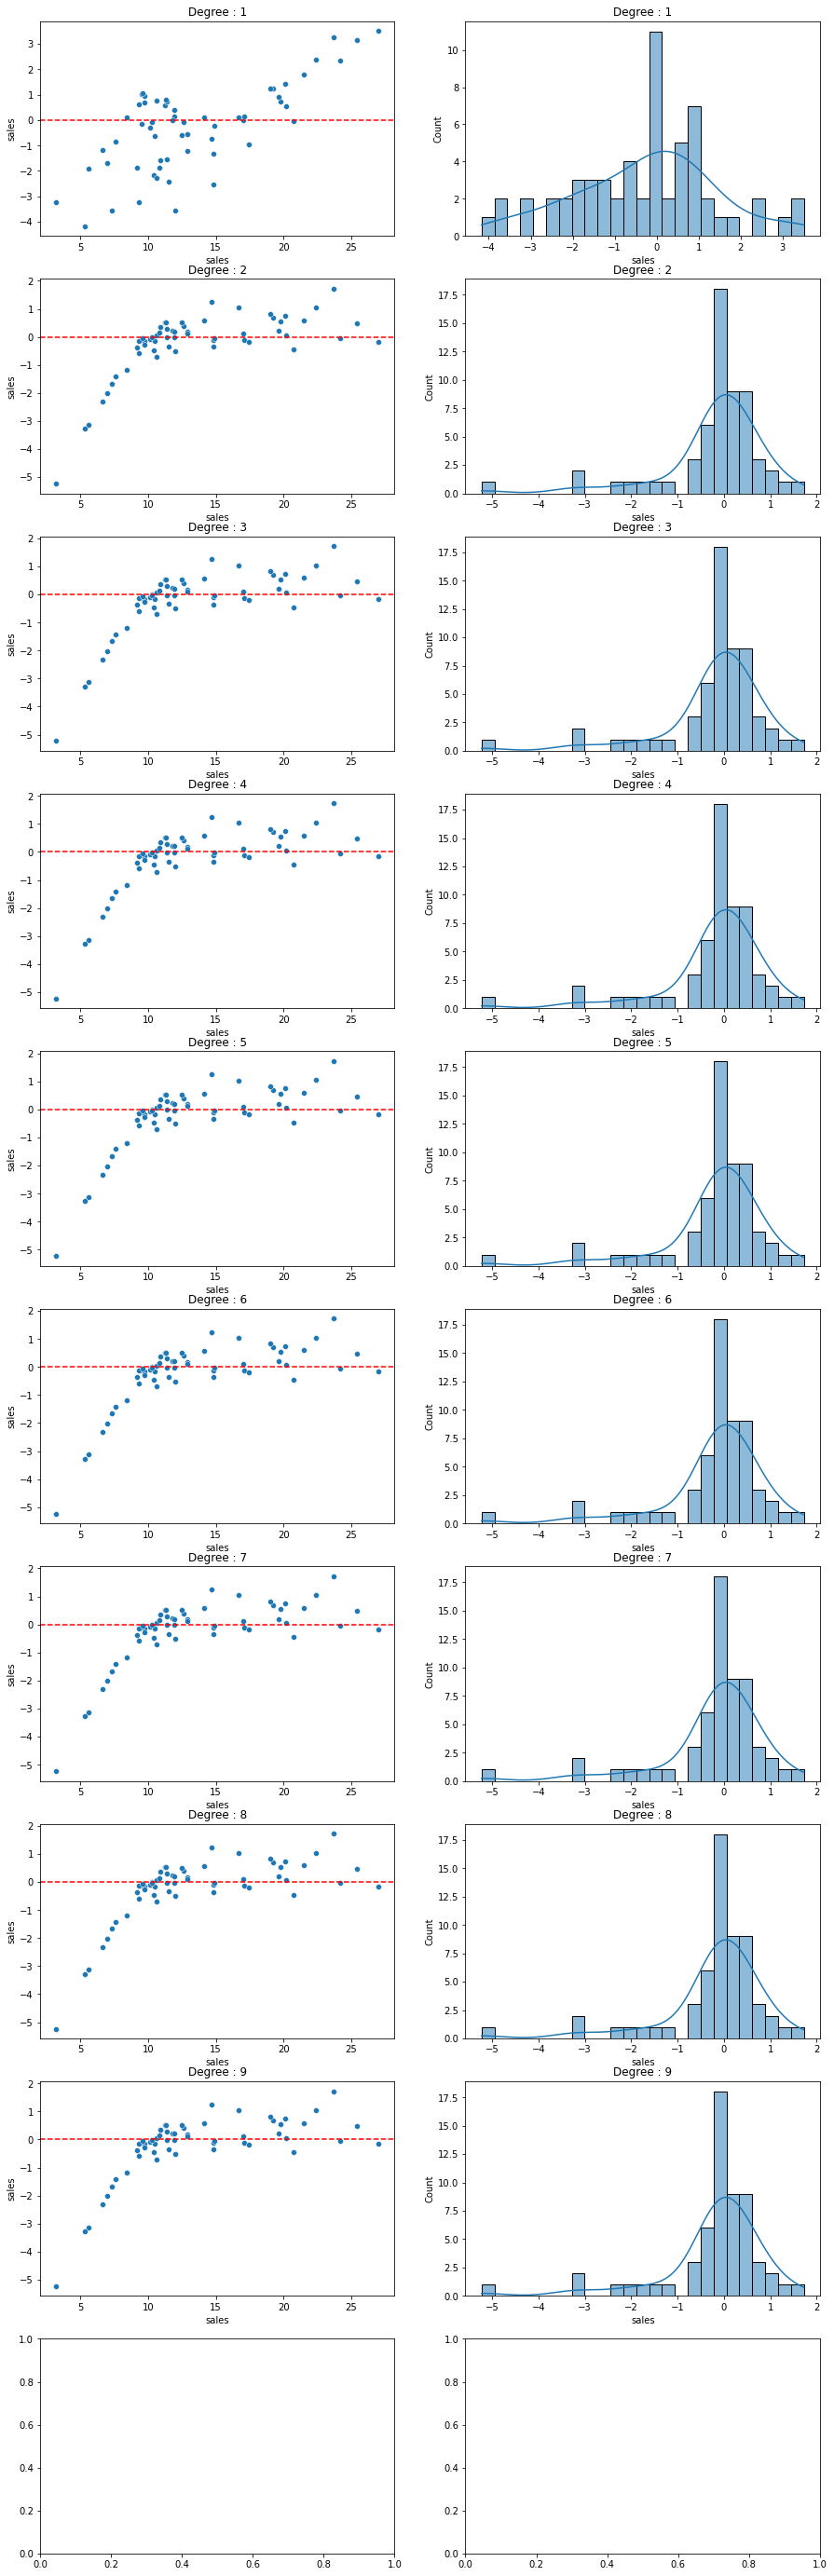

In [82]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(10,2,figsize=(15,50))

for index,curr_residual in enumerate(test_residuals_arr,):
    sns.scatterplot(x=y_test,y=curr_residual,ax=axes[index,0])
    #plt.axhline(y=0,color="red",ls="--")
    axes[index,0].title.set_text(f"Degree : {index+1}")
    axes[index,0].axhline(y=0,color="red",ls="--")
    sns.histplot(curr_residual,bins=25,kde=True,ax=axes[index,1])
    axes[index,1].title.set_text(f"Degree : {index+1}")
plt.show()

## ElasticNet

### Chose the right model

In [83]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []
# Residuals Per degree
test_residuals_arr = []

for d in range(1,10):
    
    print(f"\n\nChecking for Degree {d}")
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # SCALE THE TRAIN AND TEST SET BEFORE EVALUATING
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # TRAIN ON THIS NEW POLY SET USING RIDGE CV
    """
    2 ways to mitigate the convergence problem for search parameter
    a)Smaller the Epsilon Value(eps) the larger range you are checking from 0.001 to 0.1 
    b)Increase max iterations from default of 1000 to 1000000
    """
    en_cv_model = ElasticNetCV(l1_ratio=en_ratio,eps=en_eps,n_alphas=en_alphas,max_iter=en_max_iter)
    en_cv_model.fit(X_train,y_train)
        
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = en_cv_model.predict(X_train)
    test_pred = en_cv_model.predict(X_test)
    
    # calculate residuals
    test_residuals = y_test -  test_pred
    
    # Calculate Errors
    
    # Errors on Train Set
    print("Calculating Training Error")
    train_RMSE = all_error_metrics(y_train,train_pred)["rmse"]
    
    # Errors on Test Set
    print("Calculating Testing Error")
    test_RMSE = all_error_metrics(y_test,test_pred)["rmse"]
    
    # Print Model Coeffecients
    print(f"Model Coeffecients \n{en_cv_model.coef_} ")
    
    # Print Best Lambda & L1 ratio for this model
    print(f"Best Lambda for this model is  {en_cv_model.alpha_} & l1 ratio is {en_cv_model.l1_ratio_} ")

    # Append errors,test_residuals to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)
    test_residuals_arr.append(test_residuals)



Checking for Degree 1
Calculating Training Error
MAE is : 1.2578737656085783 , MSE is : 3.0245049075610955 , RMSE is : 1.7391103781994677 
Calculating Testing Error
MAE is : 1.2219770611672518 , MSE is : 2.3784657395975066 , RMSE is : 1.542227525236632 
Model Coeffecients 
[3.6798819  2.67794399 0.        ] 
Best Lambda for this model is  0.0915650077992292 & l1 ratio is 1.0 


Checking for Degree 2
Calculating Training Error
MAE is : 0.390761051400428 , MSE is : 0.35184907432332335 , RMSE is : 0.593168672742689 
Calculating Testing Error
MAE is : 0.4747387484223056 , MSE is : 0.4323411131522269 , RMSE is : 0.6575265113683454 
Model Coeffecients 
[ 4.0868354   0.23218079  0.12348967 -2.59304716  3.7542211  -0.16783813
  0.          0.12717958 -0.        ] 
Best Lambda for this model is  0.008055973939899815 & l1 ratio is 1.0 


Checking for Degree 3
Calculating Training Error
MAE is : 0.3307056225674498 , MSE is : 0.26560587370195693 , RMSE is : 0.5153696476335766 
Calculating Testin

In [84]:
train_rmse_errors

[1.7391103781994677,
 0.593168672742689,
 0.5153696476335766,
 0.49493252872564025,
 0.4948139762555465,
 0.5024519619855718,
 0.510318417455935,
 0.501815322080928,
 0.5098339637681596]

In [85]:
rmse_err_df = pd.DataFrame(list(zip(train_rmse_errors,test_rmse_errors)),columns=['TrainingError','Testing Error'])
rmse_err_df

,TrainingError,Testing Error
0,1.739110,1.542228
1,0.593169,0.657527
2,0.515370,0.606314
3,0.494933,0.589236
4,0.494814,0.593743
5,0.502452,0.602844
6,0.510318,0.607801
7,0.501815,0.605360
8,0.509834,0.610787


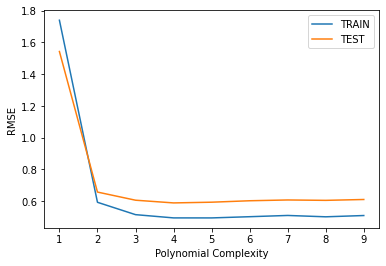

In [86]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [87]:
# We should use 1 or 2 degrees less than best fit because it is the region of risk.

### Plot Test Residuals,KDE for each degree tested

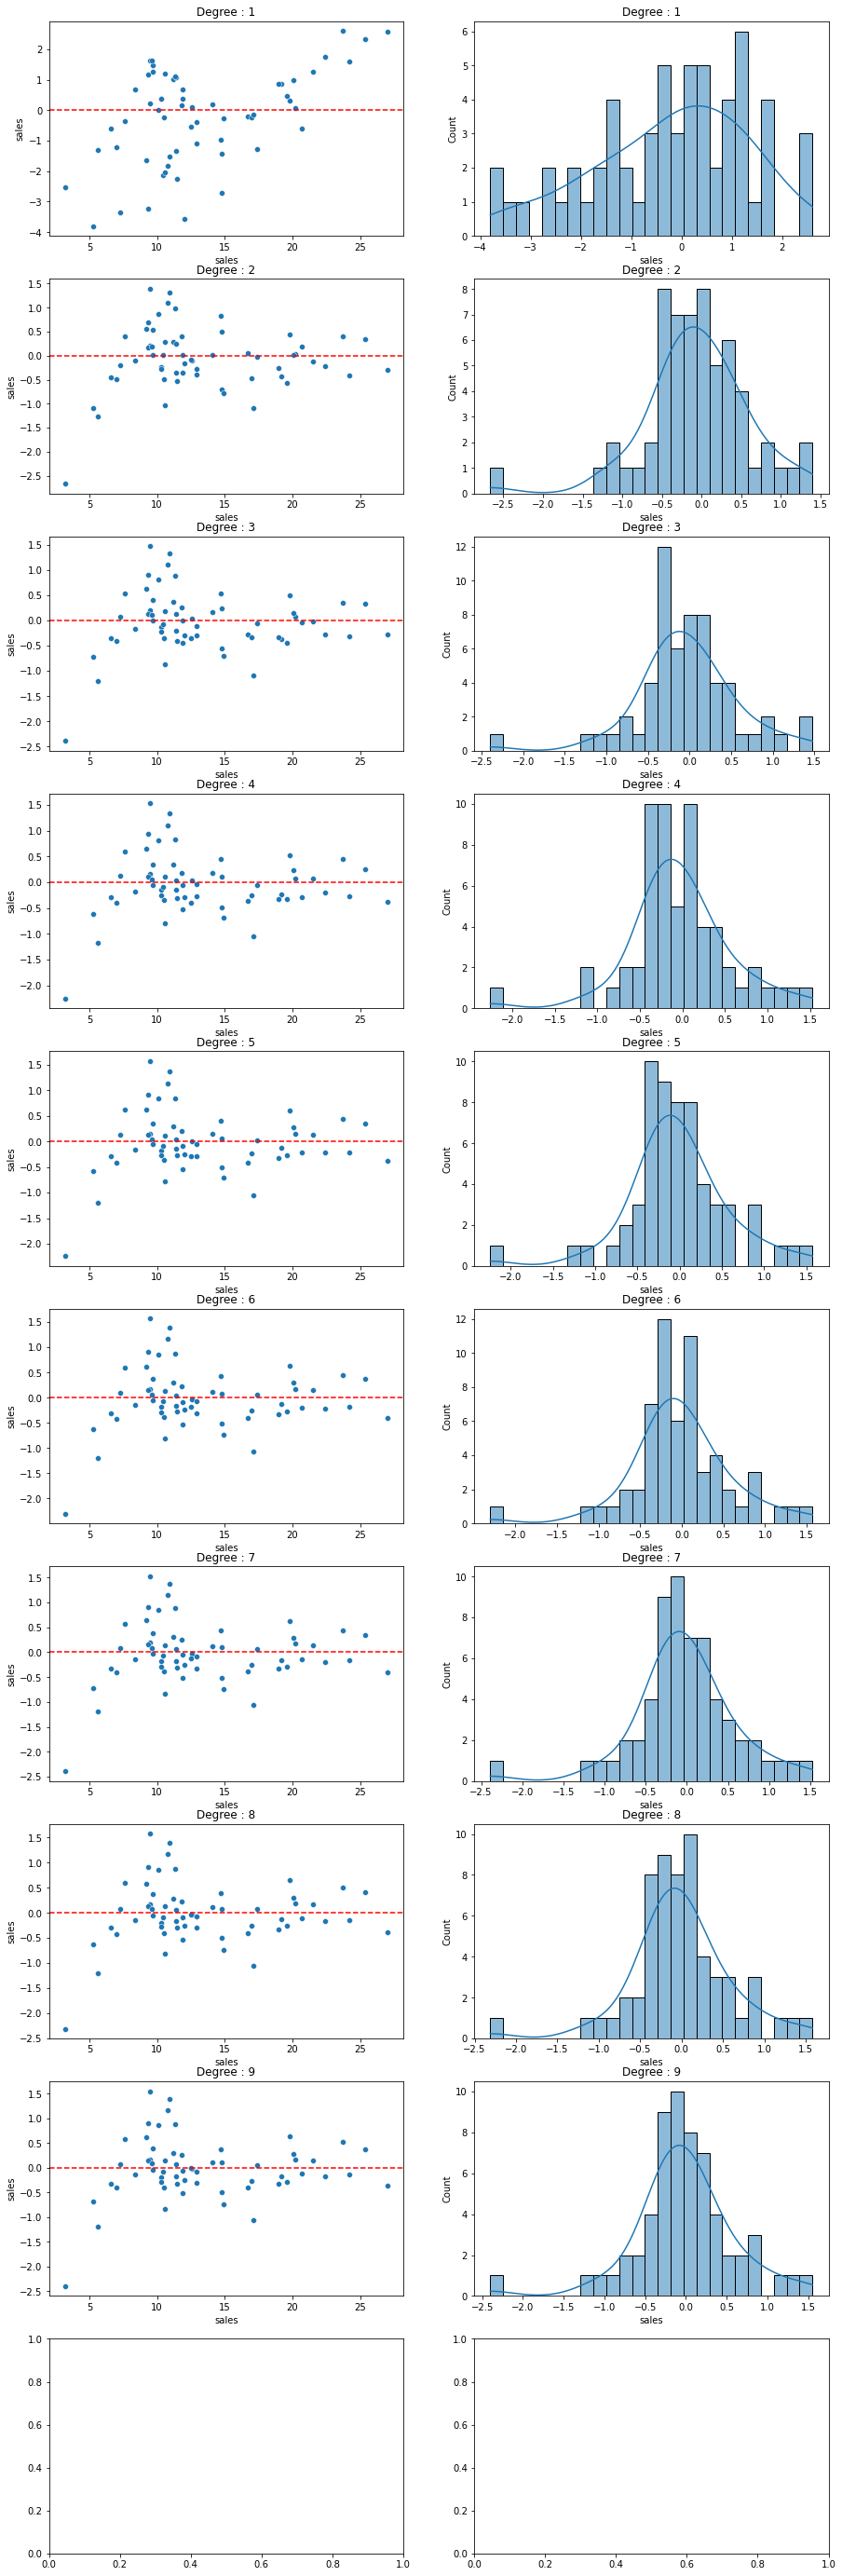

In [88]:
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(10,2,figsize=(15,50))

for index,curr_residual in enumerate(test_residuals_arr,):
    sns.scatterplot(x=y_test,y=curr_residual,ax=axes[index,0])
    #plt.axhline(y=0,color="red",ls="--")
    axes[index,0].title.set_text(f"Degree : {index+1}")
    axes[index,0].axhline(y=0,color="red",ls="--")
    sns.histplot(curr_residual,bins=25,kde=True,ax=axes[index,1])
    axes[index,1].title.set_text(f"Degree : {index+1}")
plt.show()